Progetto di Banfi Michele 869294

# Chiarimenti
- [ ] Rendimento cumulato
- [ ] Mean o Last quando si fa il groupby => sempre last
- [ ] Rendimenti da usare durante tutta la durata del progetto.. log?
- [ ] "Relazione tra i diversi titoli" => matrice di cov() tra essi??
- [ ] Correlazione dei rendimenti => autocorrelazione => sistemerá il file
- [ ] Fama-French => guardare lezioni

# 1) Sommario dei dati utilizzati

Financials:
1. **JPM** JPMorgan Chase & Co. 
2. **BAC** Bank Of America Corp

Healtcare:
1. **JNJ** Johnson & Johnson
2. **PFE** Pfizer Inc.

Energy
1. **CVX** Chevron Corporation
2. **XOM** Exxon Mobil Corporation

Importiamo le librerie necessarie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Scarichiamo i dati dei titoli selezionati, compresi tra le seguenti date: 30.11.2012 – 30.11.2022.

In [2]:
start = "2012-11-30"
end = "2022-11-30"

#Tech
NFLX = yf.download("NFLX", start, end)
META = yf.download("META", start, end)

#Financials
GS = yf.download("GS", start, end)
C = yf.download("C", start, end)

#Consumers
KO = yf.download("KO", start, end)
PEP = yf.download("PEP", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Per avere una priva vista dei dati utilizziamo il metodo `.describe()` che ci permette di avere una breve descrizione statistica

In [3]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,236.614745,240.260388,232.767693,236.612867,236.612867,1.276042e+07
std,175.488279,177.898493,172.820707,175.370038,175.370038,1.252818e+07
min,10.787143,11.672857,10.642857,10.857143,10.857143,1.144000e+06
25%,87.544289,88.879997,85.755714,87.879997,87.879997,5.454900e+06
50%,187.179993,189.940002,184.509995,187.759995,187.759995,9.234500e+06
75%,361.959991,367.329987,356.619995,361.809998,361.809998,1.612870e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.914458e+08


In [4]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,154.807823,156.751931,152.864188,154.840413,154.840413,3.001835e+07
std,84.635594,85.713111,83.590276,84.657774,84.657774,2.392035e+07
min,22.990000,23.090000,22.670000,22.900000,22.900000,5.913100e+06
25%,82.769997,83.500000,82.150002,82.750000,82.750000,1.598860e+07
50%,151.690002,153.309998,149.630005,151.380005,151.380005,2.263500e+07
75%,194.699997,197.389999,192.119995,194.470001,194.470001,3.476080e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,3.654579e+08


In [5]:
GS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,224.747727,227.051398,222.447477,224.773882,206.544203,3.138018e+06
std,69.273988,70.064910,68.386284,69.228880,72.981478,1.463516e+06
min,116.610001,117.169998,115.620003,116.570000,98.490295,4.677000e+05
25%,172.710007,174.630005,170.970001,172.600006,150.902481,2.212200e+06
50%,205.399994,207.429993,203.539993,205.690002,188.582870,2.790500e+06
75%,244.440002,246.199997,241.669998,244.300003,223.437531,3.625500e+06
max,423.119995,426.160004,413.760010,423.850006,410.787231,2.041010e+07


In [6]:
C.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,57.526202,58.118157,56.908244,57.506822,50.457641,2.057051e+07
std,10.828254,10.862493,10.789567,10.817527,10.577107,9.417357e+06
min,34.130001,34.509998,32.000000,34.220001,28.377247,4.576200e+06
25%,48.880001,49.450001,48.360001,48.830002,41.539734,1.408430e+07
50%,54.430000,54.900002,53.810001,54.330002,48.226723,1.835730e+07
75%,67.540001,68.180000,66.790001,67.480003,59.763660,2.460000e+07
max,81.959999,83.110001,80.970001,81.910004,75.656410,1.126010e+08


In [7]:
KO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,46.926651,47.245070,46.603695,46.929503,40.544587,1.431968e+07
std,6.939751,7.013666,6.860048,6.941302,9.661581,6.087985e+06
min,35.880001,36.279999,35.580002,35.970001,26.258825,2.996300e+06
25%,41.660000,41.880001,41.439999,41.660000,32.488251,1.041560e+07
50%,45.139999,45.439999,44.840000,45.150002,38.077286,1.298670e+07
75%,51.959999,52.189999,51.580002,51.980000,47.609936,1.649160e+07
max,67.000000,67.199997,65.720001,66.209999,64.799706,6.784570e+07


In [8]:
PEP.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,116.969241,117.792304,116.131009,116.991943,103.293545,4.703236e+06
std,27.615090,27.879218,27.294506,27.594900,32.911508,1.837408e+06
min,67.779999,68.449997,67.389999,68.019997,51.033348,8.833000e+05
25%,96.580002,97.209999,96.080002,96.500000,77.057755,3.545700e+06
50%,111.680000,112.330002,110.910004,111.639999,96.272545,4.359500e+06
75%,136.479996,137.380005,135.259995,136.320007,125.871284,5.424100e+06
max,185.809998,186.619995,184.500000,185.080002,183.932663,2.755970e+07


Uniamo i dati in un unico dataframe cosi da poter studiare al meglio l'andamento storico dei prezzi. Uniamo secondo l'`Adj Close` che é il prezzo di chiusura giornaliero aggiustato con i dividendi

In [9]:
market = pd.concat([NFLX['Adj Close'], META['Adj Close'], GS['Adj Close'], C['Adj Close'], KO['Adj Close'], PEP['Adj Close']], axis=1)
market.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']

In [12]:
ciao = market.head()
print(market.head().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       NFLX &       META &          GS &          C &         KO &        PEP \\
Date       &            &            &             &            &            &            \\
\midrule
2012-11-30 &  11.672857 &  28.000000 &   99.521103 &  28.667482 &  27.682371 &  52.271511 \\
2012-12-03 &  10.857143 &  27.040001 &  100.036469 &  28.377247 &  27.288162 &  52.018406 \\
2012-12-04 &  12.378571 &  27.459999 &   98.498741 &  28.435295 &  27.120255 &  52.010952 \\
2012-12-05 &  11.910000 &  27.709999 &   98.963432 &  30.234777 &  27.237057 &  52.301300 \\
2012-12-06 &  12.310000 &  26.969999 &   99.022560 &  30.699169 &  27.288162 &  52.533886 \\
\bottomrule
\end{tabular}



Ora possiamo procede con il plot dei dati

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

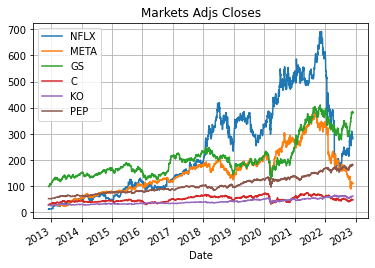

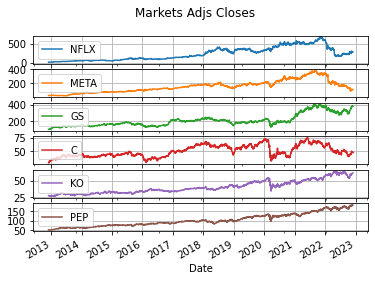

In [13]:
market.plot(grid=True, title="Markets Adjs Closes")
market.plot(grid=True, title="Markets Adjs Closes", subplots=True)

# 2) Statistiche descrittive

#### Rendimenti

Calcolo dei dati annui

In [14]:
NFLXy = NFLX.groupby(pd.Grouper(freq='Y')).last()
METAy = META.groupby(pd.Grouper(freq='Y')).last()
GSy = GS.groupby(pd.Grouper(freq='Y')).last()
Cy = C.groupby(pd.Grouper(freq='Y')).last()
KOy = KO.groupby(pd.Grouper(freq='Y')).last()
PEPy = PEP.groupby(pd.Grouper(freq='Y')).last()
marketY = pd.concat([NFLXy['Adj Close'], METAy['Adj Close'], GSy['Adj Close'], Cy['Adj Close'], KOy['Adj Close'], PEPy['Adj Close']], axis=1)
marketY.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']

In [27]:
marketY.head(14)

,NFLX,META,GS,C,KO,PEP
Date,,,,,,
2012-12-31,13.227143,26.620001,107.775780,32.805485,26.463224,51.340965
2013-12-31,52.595715,54.650002,151.741409,43.249382,31.023653,63.995522
2014-12-31,48.801430,78.019997,168.107162,44.945549,32.657391,75.044861
2015-12-31,114.379997,104.660004,158.374435,43.111053,34.335915,81.610176
2016-12-31,123.800003,115.050003,213.683670,49.967136,34.213314,87.972481
2017-12-31,191.960007,176.460007,230.210129,63.471569,39.133904,103.647491
2018-12-31,267.660004,131.089996,153.031601,45.390877,41.784622,98.659058
2019-12-31,323.570007,205.250000,214.977264,71.636078,50.392021,125.667892
2020-12-31,540.729980,273.160004,252.498810,57.520638,51.636261,140.335480


Rendimenti composti e cumulati annui

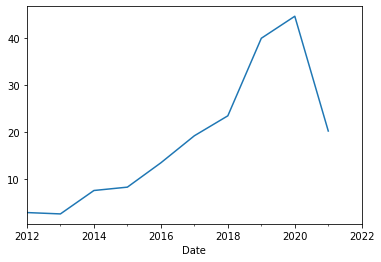

In [41]:
#Rendimento cumulato annuale
rcuNFLXys = NFLXy['Adj Close'].pct_change().shift(-1)
rcuNFLXy = (1 + rcuNFLXys).cumprod() - 1
rcuMETAys = METAy['Adj Close'].pct_change().shift(-1)
rcuMETAy = (1 + rcuMETAys).cumprod() - 1
rcuGSys = GSy['Adj Close'].pct_change().shift(-1)
rcuGSy = (1 + rcuGSys).cumprod() - 1
rcuCys = Cy['Adj Close'].pct_change().shift(-1)
rcuCy = (1 + rcuCys).cumprod() - 1
rcuKOys = KOy['Adj Close'].pct_change().shift(-1)
rcuKOy = (1 + rcuKOys).cumprod() - 1
rcuPEPys = PEPy['Adj Close'].pct_change().shift(-1)
rcuPEPy = (1 + rcuPEPys).cumprod() - 1
#Rendimento composto annuale
#+(100/80)^(1/3) - 1
rcuNFLXy.plot()
rcoNFLXy = ((marketY['NFLX'][-1]/marketY['NFLX'][0])**(1/marketY['NFLX'].count()) - 1) * 100
rcoMETAy = ((marketY['META'][-1]/marketY['META'][0])**(1/marketY['META'].count()) - 1) * 100
rcoGSy = ((marketY['GS'][-1]/marketY['GS'][0])**(1/marketY['GS'].count()) - 1) * 100
rcoCy = ((marketY['C'][-1]/marketY['C'][0])**(1/marketY['C'].count()) - 1) * 100
rcoKOy = ((marketY['KO'][-1]/marketY['KO'][0])**(1/marketY['KO'].count()) - 1) * 100
rcoPEPy = ((marketY['PEP'][-1]/marketY['PEP'][0])**(1/marketY['PEP'].count()) - 1) * 100


Rendimenti semplici e logaritmici

In [43]:
#Rendimento semplice
rsNFLX = NFLX['Adj Close'] / NFLX['Adj Close'].shift(1)
rsMETA = META['Adj Close'] / META['Adj Close'].shift(1)
rsGS = GS['Adj Close'] / GS['Adj Close'].shift(1)
rsC = C['Adj Close'] / C['Adj Close'].shift(1)
rsKO = KO['Adj Close'] / KO['Adj Close'].shift(1)
rsPEP = PEP['Adj Close'] / PEP['Adj Close'].shift(1)
rsMarket = pd.concat([rsNFLX, rsMETA, rsGS, rsC, rsKO, rsPEP], axis=1)
rsMarket.dropna()
rsMarket.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']
#Rendimento logaritmico
rlNFLX = np.log(NFLX['Adj Close'] / NFLX['Adj Close'].shift(1))
rlMETA = np.log(META['Adj Close'] / META['Adj Close'].shift(1))
rlGS = np.log(GS['Adj Close'] / GS['Adj Close'].shift(1))
rlC = np.log(C['Adj Close'] / C['Adj Close'].shift(1))
rlKO = np.log(KO['Adj Close'] / KO['Adj Close'].shift(1))
rlPEP = np.log(PEP['Adj Close'] / PEP['Adj Close'].shift(1))
rlMarket = pd.concat([rlNFLX, rlMETA, rlGS, rlC, rlKO, rlPEP], axis=1)
rlMarket.dropna()
rlMarket.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

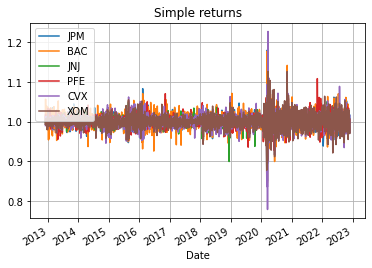

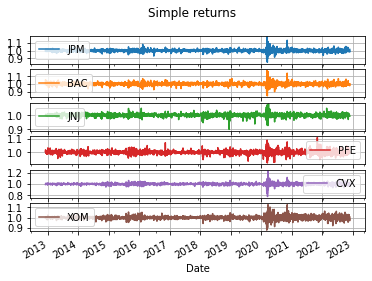

In [33]:
#Plot market simple returns
rsMarket.plot(grid=True, title="Simple returns")
rsMarket.plot(grid=True, title="Simple returns", subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

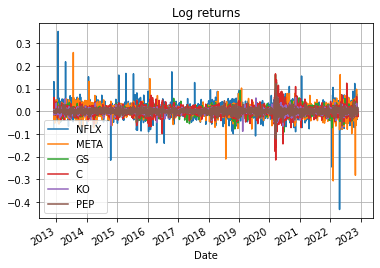

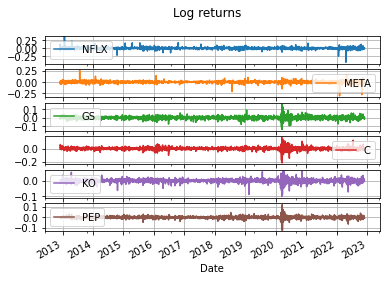

In [44]:
#Plot market Logarithmic returns
rlMarket.plot(grid=True, title="Log returns")
rlMarket.plot(grid=True, title="Log returns", subplots=True)

Ora plottiamo i rendimenti con istogrammi per vedere meglio che distribuzione hanno

Text(0.5, 1.0, 'PEP Logarithmic returns histogram')

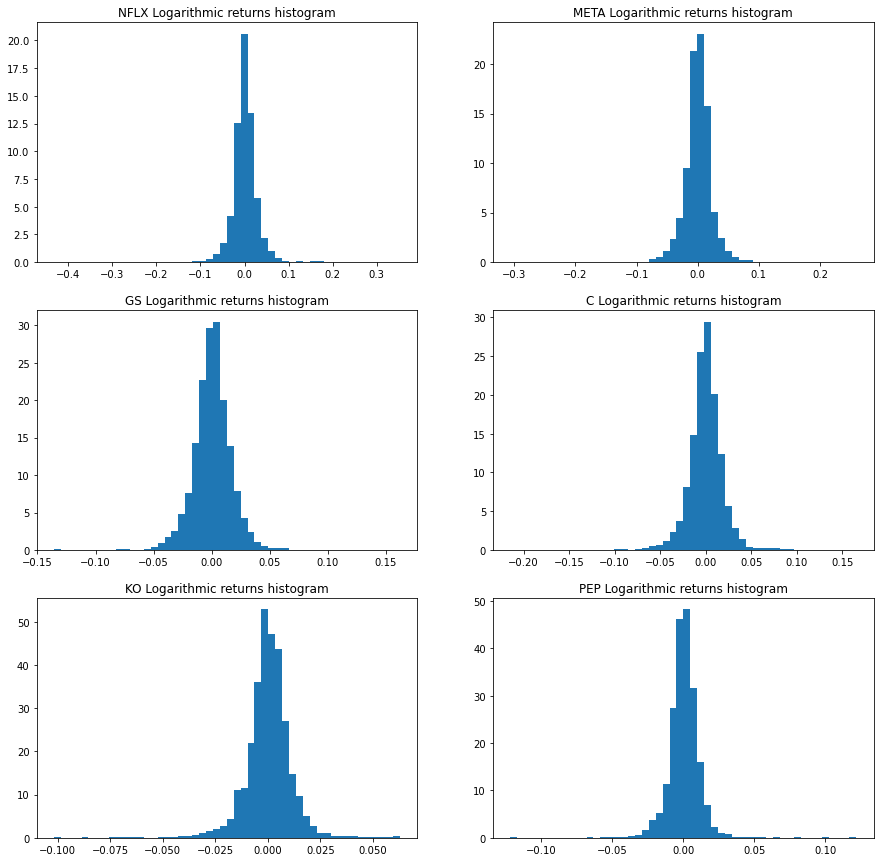

In [50]:
#Rendimenti logaritmici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rlNFLX, density=True, bins=50)
plt.title('NFLX Logarithmic returns histogram')

plt.subplot(322)
plt.hist(rlMETA, density=True, bins=50)
plt.title('META Logarithmic returns histogram')

plt.subplot(323)
plt.hist(rlGS, density=True, bins=50)
plt.title('GS Logarithmic returns histogram')

plt.subplot(324)
plt.hist(rlC, density=True, bins=50)
plt.title('C Logarithmic returns histogram')

plt.subplot(325)
plt.hist(rlKO, density=True, bins=50)
plt.title('KO Logarithmic returns histogram')

plt.subplot(326)
plt.hist(rlPEP, density=True, bins=50)
plt.title('PEP Logarithmic returns histogram')


In [52]:
import statsmodels.api as sm

Ora plottiamo per ogni rendimento di ogni azione:
- istogramma 
- boxplot 
- qq plot
- kernel density

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:ylabel='Density'>

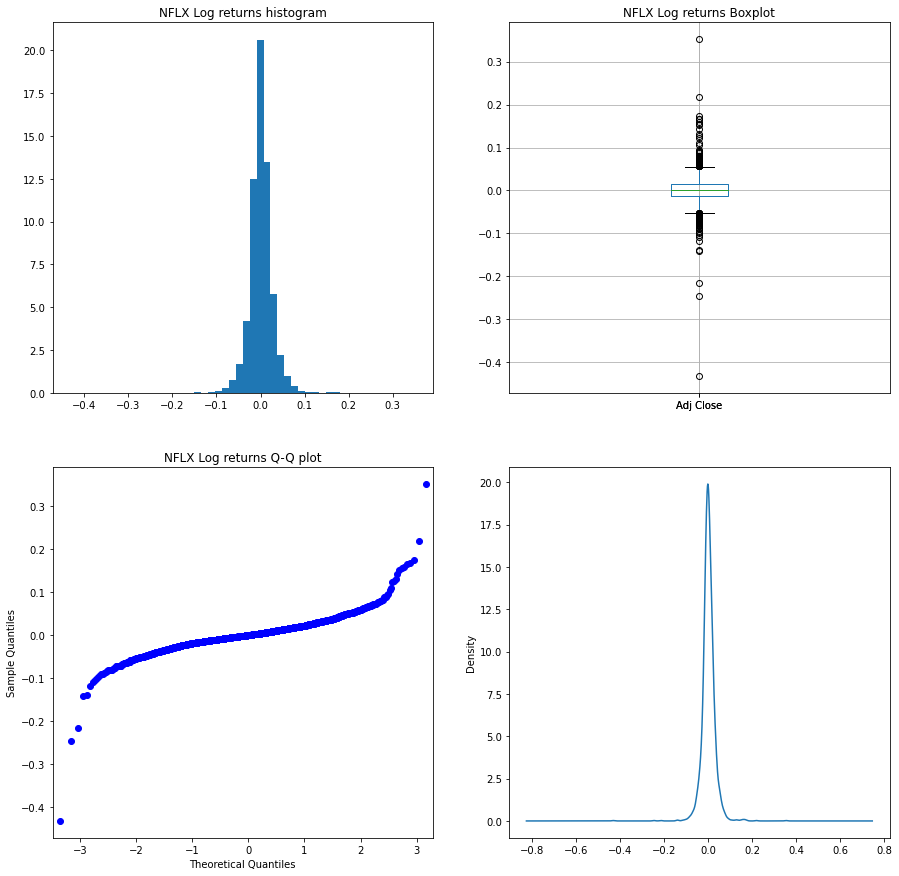

In [58]:
#JPM
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlNFLX, density=True, bins=50)
plt.title('NFLX Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlNFLX)
plt.title('NFLX Log returns Boxplot')
rlNFLX.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlNFLX, line='s', ax=ax)
plt.title('NFLX Log returns Q-Q plot')

ax=fig.add_subplot(224)
rlNFLX.plot.density()


/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'BAC Log returns Kernel Density')

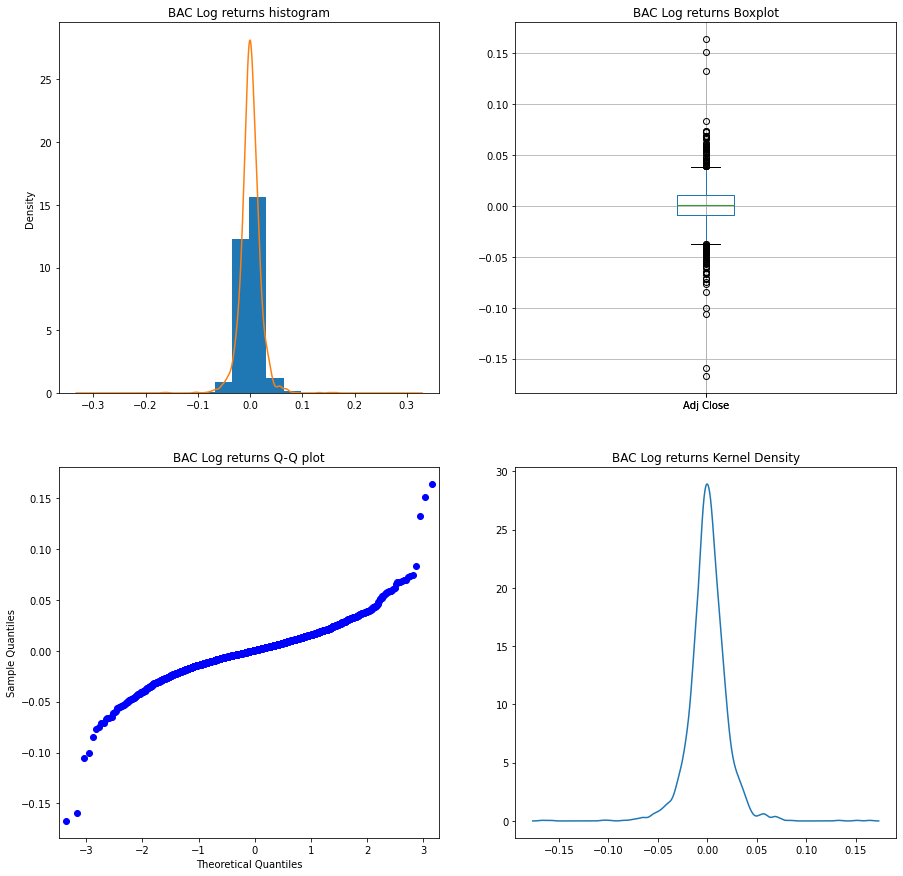

In [39]:
#BAC
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlBAC, density=True)
plt.title('BAC Log returns histogram')
rlBAC.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlBAC)
plt.title('BAC Log returns Boxplot')
rlBAC.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlBAC, line='s', ax=ax)
plt.title('BAC Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlBAC)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('BAC Log returns Kernel Density')


/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'JNJ Log returns Kernel Density')

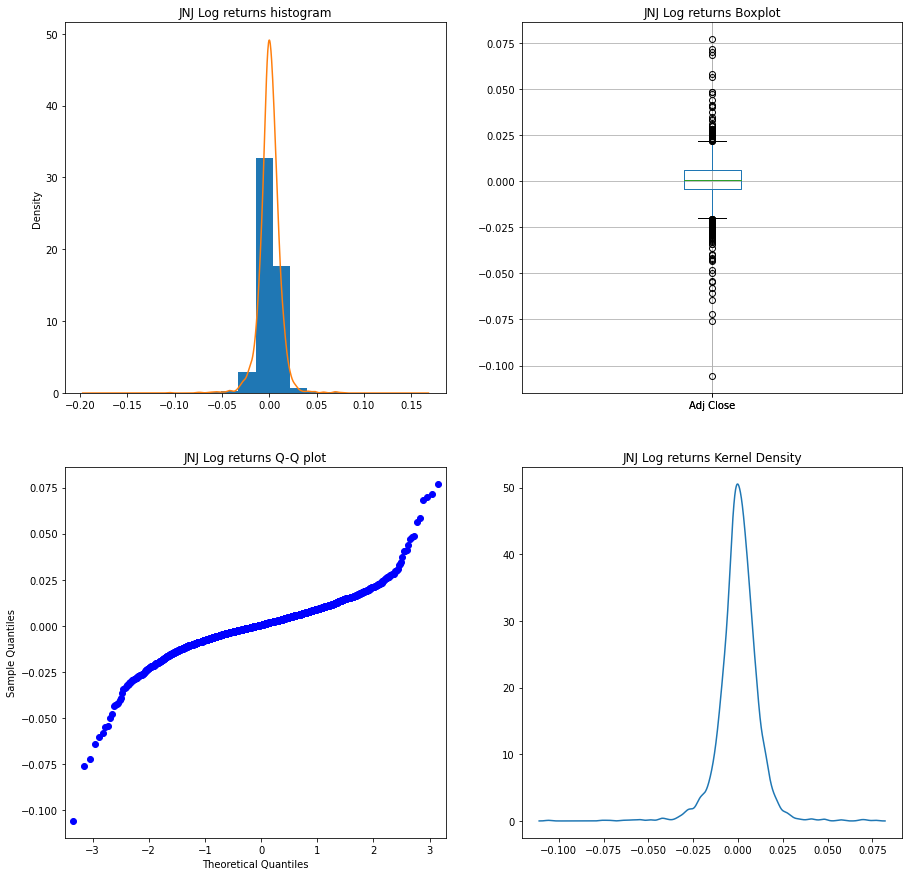

In [40]:
#JNJ
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlJNJ, density=True)
plt.title('JNJ Log returns histogram')
rlJNJ.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlJNJ)
plt.title('JNJ Log returns Boxplot')
rlJNJ.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlJNJ, line='s', ax=ax)
plt.title('JNJ Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlJNJ)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('JNJ Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'PFE Log returns Kernel Density')

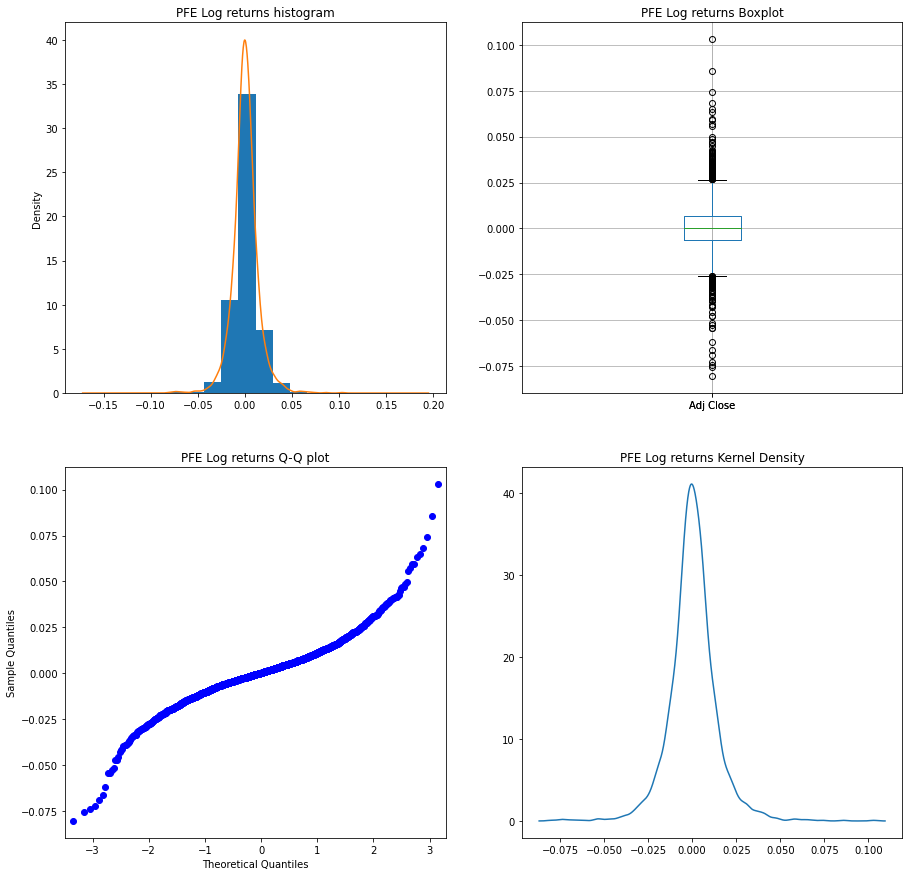

In [41]:
#PFE
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlPFE, density=True)
plt.title('PFE Log returns histogram')
rlPFE.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlPFE)
plt.title('PFE Log returns Boxplot')
rlPFE.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlPFE, line='s', ax=ax)
plt.title('PFE Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlPFE)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('PFE Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'CVX Log returns Kernel Density')

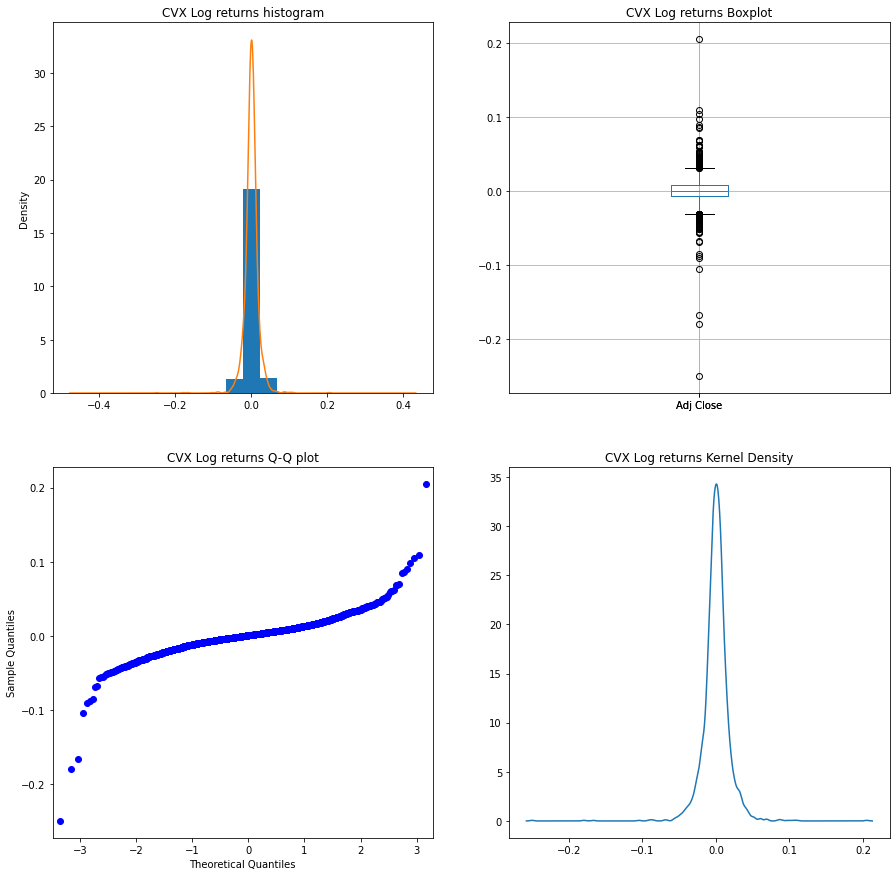

In [42]:
#CVX
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlCVX, density=True)
plt.title('CVX Log returns histogram')
rlCVX.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlCVX)
plt.title('CVX Log returns Boxplot')
rlCVX.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlCVX, line='s', ax=ax)
plt.title('CVX Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlCVX)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('CVX Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'XOM Log returns Kernel Density')

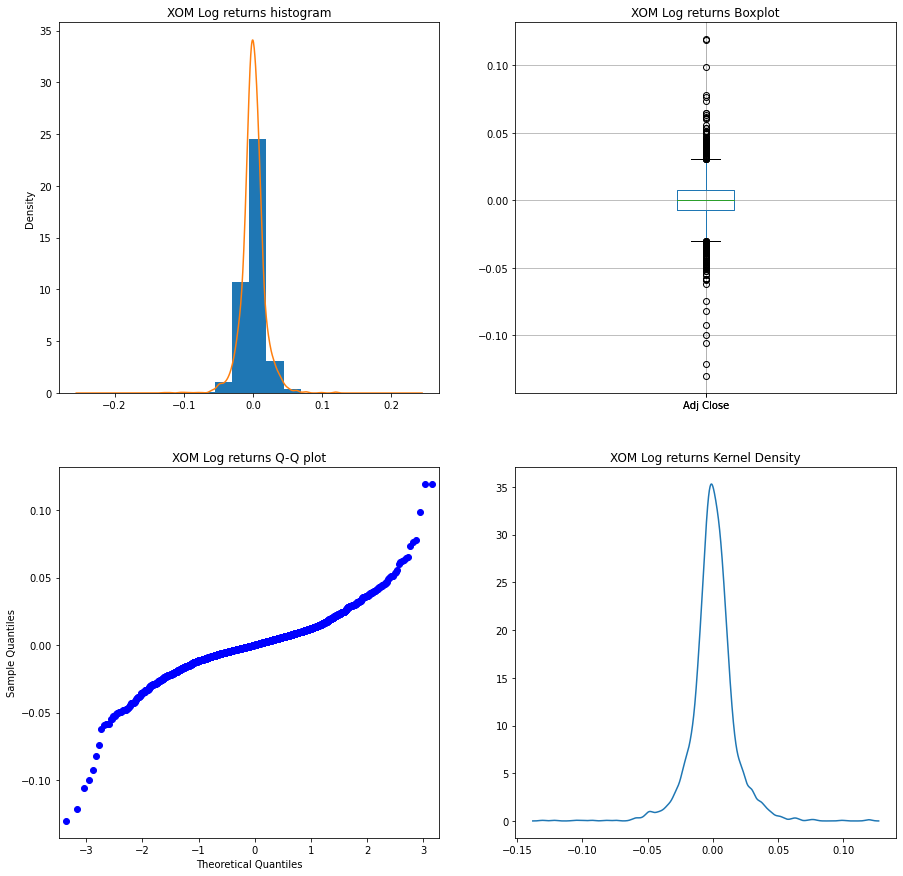

In [43]:
#XOM
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlXOM, density=True)
plt.title('XOM Log returns histogram')
rlXOM.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlXOM)
plt.title('XOM Log returns Boxplot')
rlXOM.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlXOM, line='s', ax=ax)
plt.title('XOM Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlXOM)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('XOM Log returns Kernel Density')

Ora procediamo con il calcolo delle statistiche descrittive:
- Media
- Varianza
- Deviazione standard
- Asimmetria
- Curtosi

In [44]:
#JPM
meanJPM = round(rlJPM.mean(), 4)
varJPM = round(rlJPM.var(), 4)
stdJPM = round(rlJPM.std(), 4)
skewJPM = round(rlJPM.skew(), 4)
kurtJPM = round(rlJPM.kurtosis(), 4)
print(meanJPM, varJPM, stdJPM, skewJPM, kurtJPM)

0.0006 0.0003 0.0169 -0.0678 13.807


In [45]:
#BAC
meanBAC = round(rlBAC.mean(), 4)
varBAC = round(rlBAC.var(), 4)
stdBAC = round(rlBAC.std(), 4)
skewBAC = round(rlBAC.skew(), 4)
kurtBAC = round(rlBAC.kurtosis(), 4)
print(meanBAC, varBAC, stdBAC, skewBAC, kurtBAC)

0.0006 0.0004 0.0194 -0.0652 9.9102


In [46]:
#JNJ
meanJNJ = round(rlJNJ.mean(), 4)
varJNJ = round(rlJNJ.var(), 4)
stdJNJ = round(rlJNJ.std(), 4)
skewJNJ = round(rlJNJ.skew(), 4)
kurtJNJ = round(rlJNJ.kurtosis(), 4)
print(meanJNJ, varJNJ, stdJNJ, skewJNJ, kurtJNJ)

0.0005 0.0001 0.0111 -0.4746 10.2492


In [47]:
#PFE
meanPFE = round(rlPFE.mean(), 4)
varPFE = round(rlPFE.var(), 4)
stdPFE = round(rlPFE.std(), 4)
skewPFE = round(rlPFE.skew(), 4)
kurtPFE = round(rlPFE.kurtosis(), 4)
print(meanPFE, varPFE, stdPFE, skewPFE, kurtPFE)

0.0004 0.0002 0.0138 0.1679 5.6774


In [48]:
#CVX
meanCVX = round(rlCVX.mean(), 4)
varCVX = round(rlCVX.var(), 4)
stdCVX = round(rlCVX.std(), 4)
skewCVX = round(rlCVX.skew(), 4)
kurtCVX = round(rlCVX.kurtosis(), 4)
print(meanCVX, varCVX, stdCVX, skewCVX, kurtCVX)

0.0004 0.0003 0.0183 -1.0027 29.3853


In [49]:
#XOM
meanXOM = round(rlXOM.mean(), 4)
varXOM = round(rlXOM.var(), 4)
stdXOM = round(rlXOM.std(), 4)
skewXOM = round(rlXOM.skew(), 4)
kurtXOM = round(rlXOM.kurtosis(), 4)
print(meanXOM, varXOM, stdXOM, skewXOM, kurtXOM)

0.0003 0.0003 0.0168 -0.1723 7.8798


Ora procediamo al calcolo della matrice di varianza/covarianza dei rendimenti tra i diversi titoli

In [50]:
#JPM Vs BAC
x = pd.concat([rlJPM, rlBAC], axis=1)
x.columns = ['JPM', 'BAC']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.0002928237462525007
          JPM       BAC
JPM  0.000285  0.000293
BAC  0.000293  0.000376


In [51]:
#JPM Vs PFE
x = pd.concat([rlJPM, rlPFE], axis=1)
x.columns = ['JPM', 'PFE']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

9.586142428397066e-05
          JPM       PFE
JPM  0.000285  0.000096
PFE  0.000096  0.000190


In [52]:
#JPM Vs CVX
x = pd.concat([rlJPM, rlCVX], axis=1)
x.columns = ['JPM', 'CVX']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.00018852954865773765
          JPM       CVX
JPM  0.000285  0.000189
CVX  0.000189  0.000334


In [53]:
#BAC Vs JNJ
x = pd.concat([rlBAC, rlJNJ], axis=1)
x.columns = ['BAC', 'JNJ']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

8.258061902768226e-05
          BAC       JNJ
BAC  0.000376  0.000083
JNJ  0.000083  0.000124


In [54]:
#BAC Vs XOM
x = pd.concat([rlBAC, rlXOM], axis=1)
x.columns = ['BAC', 'XOM']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.0001831375788921026
          BAC       XOM
BAC  0.000376  0.000183
XOM  0.000183  0.000283


Passiamo a esaminare la correlazione tra i diversi rendimenti

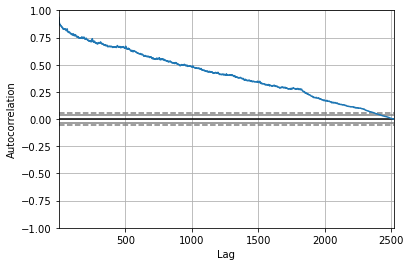

In [55]:
pd.plotting.autocorrelation_plot(JPM)
#plt.ylim(-0.25, 0.25)
plt.show()


# 3) Analisi di previsione

In [56]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

In [57]:
def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))
    lowest_aic, pdq, pdqs = None, None, None
    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(dataframe, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
                model_result = model.fit(maxiter=200, disp=False)
                
                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order
            
            except Exception as ex:
                continue
                
    return lowest_aic, pdq, pdqs

In [58]:
dfJPM = JPM['Adj Close'].resample('M').last()
lowest_aic, order, seasonal_order = arima_grid_search(dfJPM, 12)
print('ARIMA {}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA (0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 654.556


In [59]:
model = SARIMAX(dfJPM, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
model_results = model.fit(maxiter=200, disp=False)
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -324.278
Date:                            Thu, 22 Dec 2022   AIC                            654.556
Time:                                    15:42:29   BIC                            662.185
Sample:                                11-30-2012   HQIC                           657.637
                                     - 11-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0063      0.086     -0.074      0.941      -0.174       0.162
ma.S.L12      -1.0000   1380.840   

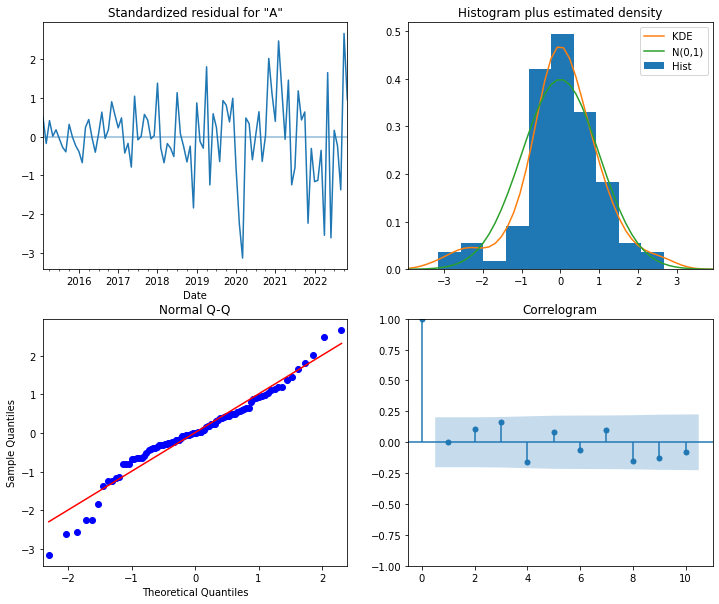

In [60]:
model_results.plot_diagnostics(figsize=(12,10));

            lower Adj Close  upper Adj Close
2017-12-31        77.192773       107.411042
2018-01-31        75.326729       104.934536
2018-02-28        87.828460       117.436244
2018-03-31        85.930811       115.538595
2018-04-30        81.629745       111.237528


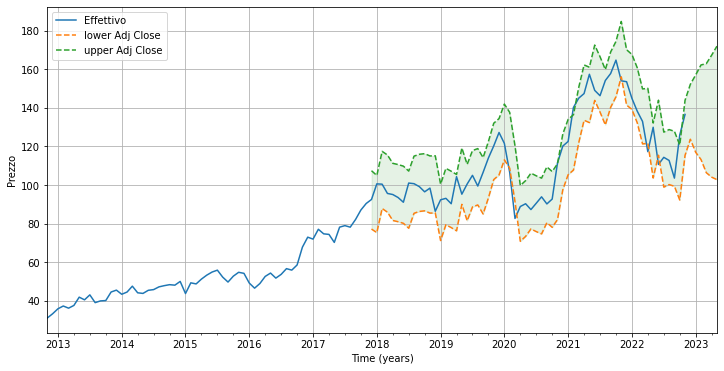

In [61]:
n = len(dfJPM.index)
prediction = model_results.get_prediction(start=n-12*5, end = n+5)
prediction_ci = prediction.conf_int()
print(prediction_ci.head())
plt.figure(figsize=(12,6))
ax = dfJPM['2010':].plot(label = 'Effettivo')
prediction_ci.plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:,0]
upper_ci = prediction_ci.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

# CAPM

Calcoliamo il beta di ciascun titolo rispetto al mercato

In [62]:
import statsmodels.formula.api as smf

In [63]:
aJPM = 'JPM'
aBAC = 'BAC'
aJNJ = 'JNJ'
aPFE = 'PFE'
aCVX = 'CVX'
aXOM = 'XOM'
marketBenchmark = '^GSPC'
df = yf.download([aJPM, aBAC, aJNJ, aPFE, aCVX, aXOM, marketBenchmark], start, end)

[*********************100%***********************]  7 of 7 completed


In [64]:
marketCloses = df['Adj Close']
x = marketCloses.pct_change().dropna()
x.head()

,BAC,CVX,JNJ,JPM,PFE,XOM,^GSPC
Date,,,,,,,
2012-12-03,-0.006085,-0.009746,-0.001147,-0.006572,0.002798,-0.006013,-0.004745
2012-12-04,0.011224,-0.006689,0.003015,-0.005881,0.003188,-0.004794,-0.001710
2012-12-05,0.056566,0.011639,0.001575,0.015529,0.018673,0.006193,0.001585
2012-12-06,0.000000,0.012171,0.001143,0.006554,-0.001170,0.003077,0.003307
2012-12-07,0.017209,0.005073,0.005710,0.026284,-0.001952,0.006818,0.002921


In [65]:
#JPM and S&P500 Beta
JPMMarket = pd.concat([x['JPM'], x['^GSPC']], axis=1)
covJPM = JPMMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaJPM = covJPM/marketVariance
betaJPM

1.1483518522096592

In [66]:
#BAC and S&P500 Beta
BACMarket = pd.concat([x['BAC'], x['^GSPC']], axis=1)
covBAC = BACMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaBAC = covBAC/marketVariance
betaBAC

1.2645882999633138

In [67]:
#JNJ and S&P500 Beta
JNJMarket = pd.concat([x['JNJ'], x['^GSPC']], axis=1)
covJNJ = JNJMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaJNJ = covJNJ/marketVariance
betaJNJ

0.6074964649534093

In [68]:
#PFE and S&P500 Beta
PFEMarket = pd.concat([x['PFE'], x['^GSPC']], axis=1)
covPFE = PFEMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaPFE = covPFE/marketVariance
betaPFE

0.6627507753445012

In [69]:
#CVX and S&P500 Beta
CVXMarket = pd.concat([x['CVX'], x['^GSPC']], axis=1)
covCVX = CVXMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaCVX = covCVX/marketVariance
betaCVX

1.0452641443544937

In [70]:
#XOM and S&P500 Beta
XOMMarket = pd.concat([x['XOM'], x['^GSPC']], axis=1)
covXOM = XOMMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaXOM = covXOM/marketVariance
betaXOM

0.9113927964703223

Ora procediamo con il calcolo del Fama French factor

In [71]:
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [72]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

In [73]:
factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']

In [74]:
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")

In [75]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start:end]

In [76]:
factor_df.head()

,mkt,smb,hml,rf
data,,,,
2012-12,1.18,1.50,3.51,0.01
2013-01,5.57,0.33,0.96,0.00
2013-02,1.29,-0.28,0.11,0.00
2013-03,4.03,0.81,-0.19,0.00
2013-04,1.55,-2.36,0.45,0.00


In [77]:
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

In [78]:
#JPM Fama French risk exposure
y = JPM['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     99.54
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.97e-32
Time:                        15:42:31   Log-Likelihood:                 225.68
No. Observations:                 119   AIC:                            -443.4
Df Residuals:                     115   BIC:                            -432.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.003      0.742      0.4

In [79]:
#BAC Fama French risk exposure
y = BAC['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     78.32
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.15e-27
Time:                        15:42:31   Log-Likelihood:                 192.56
No. Observations:                 119   AIC:                            -377.1
Df Residuals:                     115   BIC:                            -366.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0022      0.005      0.478      0.6

In [80]:
#JNJ Fama French risk exposure
y = JNJ['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     23.00
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           9.78e-12
Time:                        15:42:31   Log-Likelihood:                 230.17
No. Observations:                 119   AIC:                            -452.3
Df Residuals:                     115   BIC:                            -441.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.003      1.112      0.2

In [81]:
#PFE Fama French risk exposure
y = PFE['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     13.99
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.74e-08
Time:                        15:42:31   Log-Likelihood:                 180.58
No. Observations:                 119   AIC:                            -353.2
Df Residuals:                     115   BIC:                            -342.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.005      0.382      0.7

In [82]:
#CVX Fama French risk exposure
y = CVX['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     64.61
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.47e-24
Time:                        15:42:31   Log-Likelihood:                 194.24
No. Observations:                 119   AIC:                            -380.5
Df Residuals:                     115   BIC:                            -369.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.005     -0.197      0.8

In [83]:
#XOM Fama French risk exposure
y = XOM['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     58.21
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           5.76e-23
Time:                        15:42:31   Log-Likelihood:                 191.29
No. Observations:                 119   AIC:                            -374.6
Df Residuals:                     115   BIC:                            -363.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0018      0.005     -0.384      0.7